In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    for i in range(W.shape[0]):
        W[i,i] = 0
    return W

def recall(x,W):
    x = x.reshape((-1,1))
    for i in range(x.shape[0]):
        x[i] = np.sign(np.dot(x.T,W[i,:]))
    return x


def find_pattern(x, W, epochs):
    x_out = x.copy()
    for i in range(epochs):
        x_out = recall(x_out,W)
    return x_out


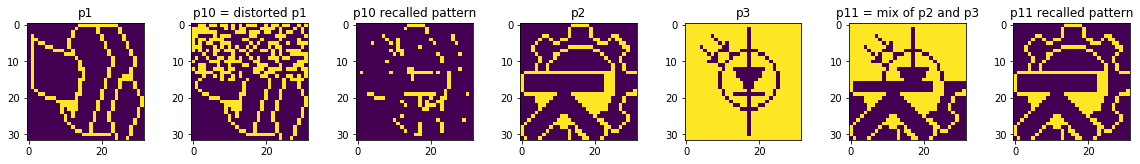

In [22]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
data = data.reshape(-1,1024)

#to start with learn the first three
train_X = data[0:3].copy()

W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)

epochs = 100

p10r = find_pattern(data[9],W,epochs)
p11r = find_pattern(data[10],W,epochs)

fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(171)
ax2 = fig.add_subplot(172)
ax3 = fig.add_subplot(173)
ax4 = fig.add_subplot(174)
ax5 = fig.add_subplot(175)
ax6 = fig.add_subplot(176)
ax7 = fig.add_subplot(177)

ax1.imshow(train_X[0].reshape((32,32)))
ax1.set_title('p1')

ax2.imshow(data[9].reshape((32,32)))
ax2.set_title('p10 = distorted p1')

ax3.imshow(p10r.reshape(32,32))
ax3.set_title('p10 recalled pattern')

ax4.imshow(train_X[1].reshape((32,32)))
ax4.set_title('p2')

ax5.imshow(train_X[2].reshape((32,32)))
ax5.set_title('p3')

ax6.imshow(data[10].reshape((32,32)))
ax6.set_title('p11 = mix of p2 and p3')

ax7.imshow(p11r.reshape(32,32))
ax7.set_title('p11 recalled pattern')

plt.tight_layout()
plt.show()

In [30]:
def recall_async(x,W):
    order = np.arange(W.shape[0]) 
    np.random.shuffle(order)
    for i in order:
        if np.sum(W[i,:]*x)>0: 
            x[i] = 1
        else:
            x[i] = -1
    return x

def find_pattern_async(x, W, epochs):
    #arr = np.arange(10)
    x_out = x.copy()
    for i in range(epochs):
        x_out = recall_async(x_out,W)
        #if i %100 in arr:
        if i%100 == 0:
            plt.figure()
            plt.imshow(x_out.reshape((32,32)))
            plt.title('Recalled pattern in epoch: '+str(i+1))
    return x

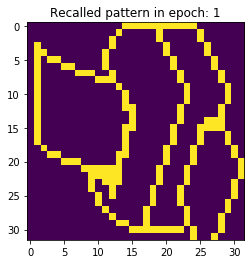

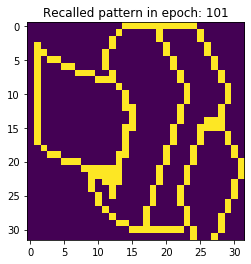

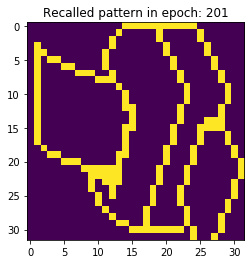

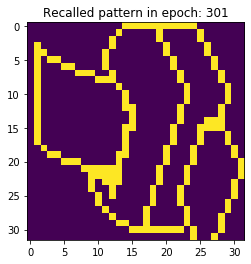

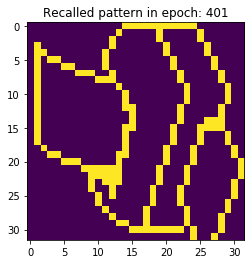

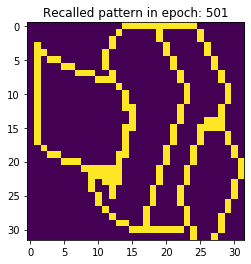

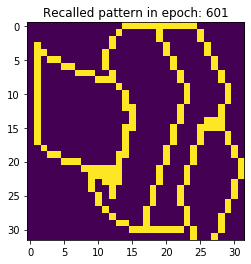

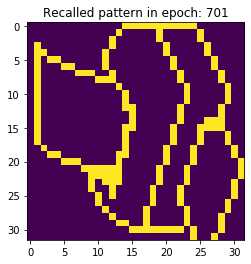

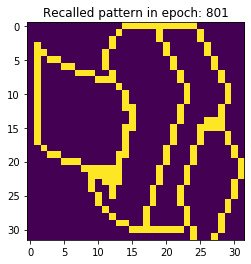

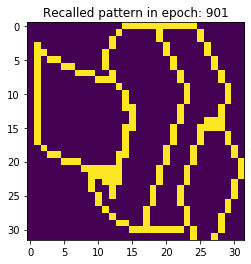

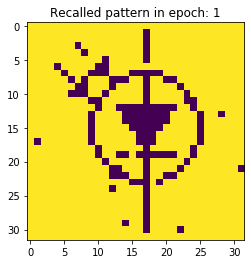

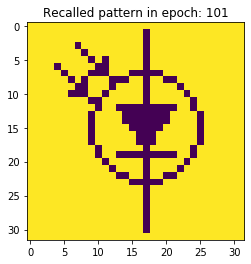

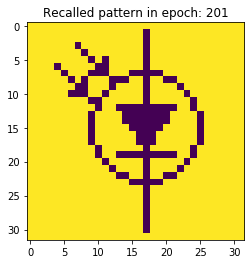

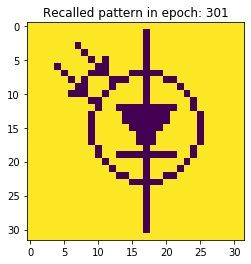

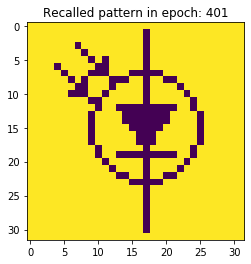

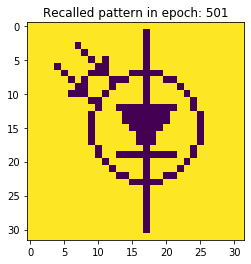

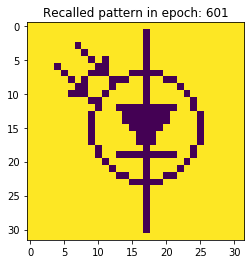

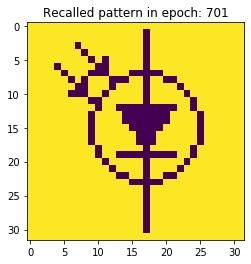

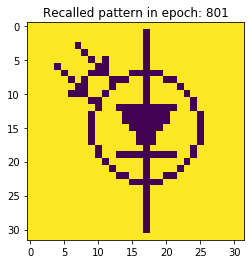

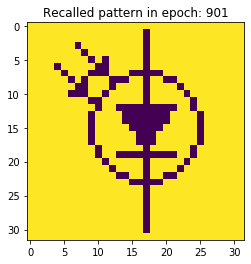

In [32]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
data = data.reshape(-1,1024)

#to start with learn the first three
train_X = data[0:3].copy()

W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)

epochs = 1000
x = find_pattern_async(data[9],W,epochs)
x = find_pattern_async(data[10],W,epochs)


Vi ser att Async lyckas generera tillbaka pattern 10 som synkronos inte lyckas återgenerera. Vi ser också att de konvergerar mot olika lösningar på pattern 11. Async går mot 3 medan synk går mot 2. 